In [2]:
#terminal portion - jupyter notebook crashes, so this cell must be done in separate python script and then np arrays extracted back to notebook later
import cv2
import matplotlib
matplotlib.use('TkAgg')
from roipoly import RoiPoly
from matplotlib import pyplot as plt
import numpy as np

image = cv2.imread('/Users/alanacrognale/Downloads/ECE5242Proj1-train/14.png') #change directory file - do this for all training images
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)
my_roi = RoiPoly(color='r')
plt.show()
mask = my_roi.get_mask(image[:,:,0])
np.save('/Users/alanacrognale/Desktop/mask_14',mask) #change directory file - do this for all training images

In [2]:
#import training set labels
import numpy as np
import cv2
import matplotlib
matplotlib.use('TkAgg')
from roipoly import RoiPoly
from matplotlib import pyplot as plt

mask = np.load('/Users/alanacrognale/Desktop/mask_14.npy') #change directory file - do this for all training images
red_coord = np.where(mask == True)
other_coord = np.where(mask == False)
red_class = image[red_coord[0],red_coord[1]]
other_class = image[other_coord[0],other_coord[1]]

#red = red_class #uncomment first time run only, comment all other runs
#other = other_class #uncomment first time run only, comment all other runs
red = np.concatenate((red,red_class)) #comment first time run only, uncomment all other runs
other = np.concatenate((other,other_class))

In [121]:
#save final labels
np.save('/Users/alanacrognale/Desktop/red',red) #change directory file
np.save('/Users/alanacrognale/Desktop/other',other) #change directory file

In [123]:
#load labels
red_final = np.load('/Users/alanacrognale/Desktop/red.npy') #change directory file
other_final = np.load('/Users/alanacrognale/Desktop/other.npy') #change directory file

(782892, 3)
(52137108, 3)


In [423]:
#red_train = np.concatenate((red_final[1::3],red_final[2::3])) #comment out later, to use for temp cross validation
#red_test = red_final[::3] #comment out later, to use for temp cross validation
#other_train = np.concatenate((other_final[1::3],other_final[2::3])) #comment out later, to use for temp cross validation
#other_test = other_final[::3] #comment out later, to use for temp cross validation

red_train = red_final #to use for actual test
other_train = other_final #to use for actual test

red_mean = np.mean(red_train,axis=0)
red_cov = np.cov(red_train, rowvar=False)
other_mean = np.mean(other_train,axis=0)
other_cov = np.cov(other_train,rowvar=False)

red_prob = red_train.shape[0]/(red_train.shape[0]+other_train.shape[0])
other_prob = 1-red_prob

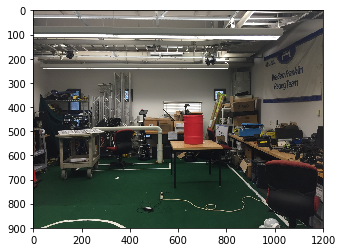

In [444]:
#begin test script here
%matplotlib inline
image = cv2.imread('/Users/alanacrognale/Downloads/ECE5242Proj1-train/5.3.png') #change directory file depending on which test image running
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)
plt.show()

In [ ]:
#long cell to run - gaussian probability calculations
from scipy.stats import multivariate_normal
red_coordinates_temp = np.array([])
index_i = -1
index_j = -1
for i in image:
    index_i = index_i + 1
    index_j = -1
    for j in i:
        index_j = index_j + 1
        
        cond_prob_red = multivariate_normal.pdf(j, mean=red_mean, cov=red_cov)
        cond_prob_other = multivariate_normal.pdf(j, mean=other_mean, cov=other_cov)
        prob = (cond_prob_red*red_prob)/((cond_prob_red*red_prob)+(cond_prob_other*other_prob))
        
        if prob >= 0.80:
            coord = [index_i,index_j]
            red_coordinates_temp = np.concatenate((red_coordinates_temp, coord))
            
red_coordinates = np.reshape(red_coordinates_temp, (-1, 2))
red_coordinates = red_coordinates.astype(int)

center coordinates:  (418.5150084317032, 598.6767847105115)
distance in meters:  4


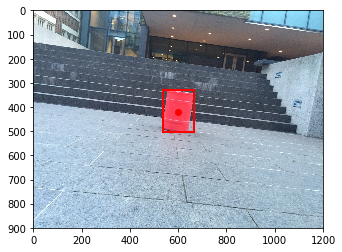

In [443]:
#display results
import skimage

binary_img = np.zeros((900, 1200))
binary_img[red_coordinates[:,0],red_coordinates[:,1]] = 1

labeled = skimage.measure.label(binary_img)
regions = skimage.measure.regionprops(labeled)

max_area = 0;
for region in skimage.measure.regionprops(labeled):
    if region.area >= max_area:
        max_area = region.area
        max_region = region
        
center = max_region.centroid
print("center coordinates: ", center)

minr, minc, maxr, maxc = max_region.bbox
actual_H = 0.581025
image_h_ratio = (maxr-minr)/900
f = 1.22
dist = f * actual_H / image_h_ratio
print("distance in meters: ", round(dist))

rect = mpatches.Rectangle((minc, minr), maxc - minc, maxr - minr, fill=False, edgecolor='red', linewidth=2)
%matplotlib inline
fig,ax = plt.subplots(1)
plt.imshow(image)
ax.add_patch(rect)
plt.scatter(center[1],center[0],c='r')
plt.show()